<a href="https://colab.research.google.com/github/jhonda18/Python1/blob/main/N3_C1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p><img alt="Colaboratory logo" height="140px" src="https://upload.wikimedia.org/wikipedia/commons/archive/f/fb/20161010213812%21Escudo-UdeA.svg" align="left" hspace="10px" vspace="0px"></p>

<h1> <b> Técnicas computacionales en Python para Ciencias Económicas - Universidad de Antioquia </b> </h1>
<hr size=10 noshade color="green">
<p>
<img alt="CC BY-NC-SA logo" height="70px" src="https://lahormigonera.info/wp-content/uploads/2014/04/by-nc-sa-ccLicense.png" align="left" hspace="0px" vspace="0px">
</p>

<div align="right">  
Este documento está bajo licencia <a href="https://creativecommons.org/licenses/by-nc-sa/4.0/deed.es">[CC BY-NC-SA]</a><br> 
<a href="mailto:sheryl.avendano@udea.edu.co"> ✉ Sheryl Avendaño </a> ,  <a href="mailto:sergio.sanes@udea.edu.co"> ✉ Sergio Sanes </a>, <a href="mailto: mario.sucerquia@udea.edu.co"> ✉ Mario Sucerquia </a><br>
Versión actualizada: 3-Ago-2020
</div>

<br>

**El presente curso hace parte de la Facultad de Ciencias Económicas (FCE) de la Universidad de Antioquia.**

El curso será dictado en 16 sesiones o clases de 2 horas los días martes y jueves por medio de Google meeting. Para un total de dedicación temporal de 32 horas. 


In [ ]:
!pip install chart_studio --quiet

     |████████████████████████████████| 71kB 2.1MB/s 


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 12})

In [ ]:
import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import iplot
from plotly import tools
import plotly.express as px

# **El formato JSON y CSV**

El módulo de **Pandas** tiene una gran cantidad de funciones para la letura de datos en distintos formatos, que puede consultar la [documentación](https://pandas.pydata.org/docs/user_guide/io.html).

**CSV** es el formato texto plano más usado en el mundo de los datos. Sin embargo no es el único formato de texto que se conoce, hay dos en particular: los formatos de [Excel](https://pandas.pydata.org/docs/user_guide/io.html#io-excel-reader) y los [JSON](https://pandas.pydata.org/docs/user_guide/io.html#io-json-reader). **JSON** o JavaScript Object Notation es un formato de intercambio de Datos que se considera uno de los más independientes del lenguaje. JSON surgió de la necesidad de un protocolo de comunicación de servidor a navegador en tiempo real y es uno de los formatos más extendido para tal fin. 

```
{
    "menu": {
        "id": "xxxx",
        "value": "xxxx"
    }
}
```

Si vamos a la [página](https://www.datos.gov.co/browse?sortBy=newest) oficial de datos de Colombia, tendremos una enorme base de datos para trabajar que podemos leer en formato JSON o el formato CSV.  Vamos a leer los [datos](https://www.datos.gov.co/Transporte/Informe-de-carga-a-rea/4wwa-qb9a) de carga áerea en medio del aislamiento. En la página usted puede descargar los datos de dos maneras:



![texto alternativo](https://github.com/diplomado-bigdata-machinelearning-udea/curso0/blob/master/s07/imagenes/read.png?raw=true)

Cuando usted entra a **API**, allí le habla un poco sobre lo que es SODA, Socrata Open Data API, puede revisar sobre este tipo de API para manejo de bases abiertas, pero en la parte inferior hay un link de internet, seguido de dos opcione podemos escoger JSON o CSV y leer esos datos actualizados usando pandas y sus funciones **read_csv()** o **read_json()**. 

## Primer paquete de datos

Trabajar con la información consignada en este [enlace](https://www.datos.gov.co/Comercio-Industria-y-Turismo/Estructura-Empresarial-seg%C3%BAn-tama%C3%B1o-de-empresa-y-s/qsry-d9ti)

In [ ]:
source = "https://www.datos.gov.co/resource/qsry-d9ti.json"
data1 = pd.read_json(source)
print("Shape del conjunto de datos:",data1.shape)
data1.head()

Shape del conjunto de datos: (24, 12)


,secciones,descripci_n,no_de_empresas_micro,no_de_empresas_peque_a,no_de_empresas_mediana,no_de_empresas_grande,activos_micro,activos_peque_a,activos_mediana,activos_grande,total_empresas,total_activos
0,A,"Agricultura, ganadería, caza, silvicultura y p...",1782,589.0,246.0,61.0,94608451062,9.547165e+11,2.320141e+12,5.532929e+12,2678,8902394899663
1,B,Explotación de minas y canteras,533,97.0,40.0,26.0,18980841011,1.731597e+11,3.831393e+11,5.981170e+12,696,6556449864872
2,C,Industrias manufactureras,15688,1426.0,322.0,137.0,416719731347,1.924431e+12,3.167027e+12,3.277489e+13,17573,38283062843749
3,D,"Suministro de electricidad, gas, vapor y aire ...",97,23.0,15.0,18.0,5542594853,3.678438e+10,1.690693e+11,3.906635e+13,153,39277749293610
4,E,Distribución de agua; evacuación y tratamiento...,491,47.0,12.0,2.0,14675057791,5.147964e+10,1.014641e+11,2.060132e+12,552,2227750643179


## Segundo paquete de datos

Vamos a trabajar con la información consignada en este [enlace](https://www.datos.gov.co/Econom-a-y-Finanzas/Tasa-de-Cambio-Representativa-del-Mercado-TRM/32sa-8pi3) 

In [ ]:
source = "https://www.datos.gov.co/resource/32sa-8pi3.json?$limit=10000&$where=vigenciadesde%3E%272019%27"
data2 = pd.read_json(source)
data2.head()

,valor,unidad,vigenciadesde,vigenciahasta
0,3250.01,COP,2019-01-03T00:00:00.000,2019-01-03T00:00:00.000
1,3241.20,COP,2019-01-04T00:00:00.000,2019-01-04T00:00:00.000
2,3208.56,COP,2019-01-05T00:00:00.000,2019-01-08T00:00:00.000
3,3164.75,COP,2019-01-09T00:00:00.000,2019-01-09T00:00:00.000
4,3128.07,COP,2019-01-10T00:00:00.000,2019-01-10T00:00:00.000


# **Gráficos comunes de exploración**

Tanto Numpy como Matplotlib son módulos de Python que nos permiten trabajar problemas sencillos de estadística y exploración de datos. En este notebook trabajaremos con 2 conjuntos de datos reales pero primero aprendamos a descargarlos.



## Tomado parte de los datos del paquete 1



In [ ]:
#iloc --> método de localización por índice (fila,columna)
Totales = data1.iloc[23]
#drop --> borrar la fila
data1 = data1.drop(23)

In [ ]:
#En pandas para llamar un columna es igual que un diccionario
sectores = np.array(data1['secciones'])
# {} --> diccionarios
# key:value
descripcion = { sectores[i]: data1['descripci_n'].iloc[i] for i in range(len(sectores)) }

numero_micro = np.array(data1['no_de_empresas_micro'])
activos_micro = np.array(data1['activos_micro'])/1e9 #miles de millones de pesos colombianos

## La torta de datos

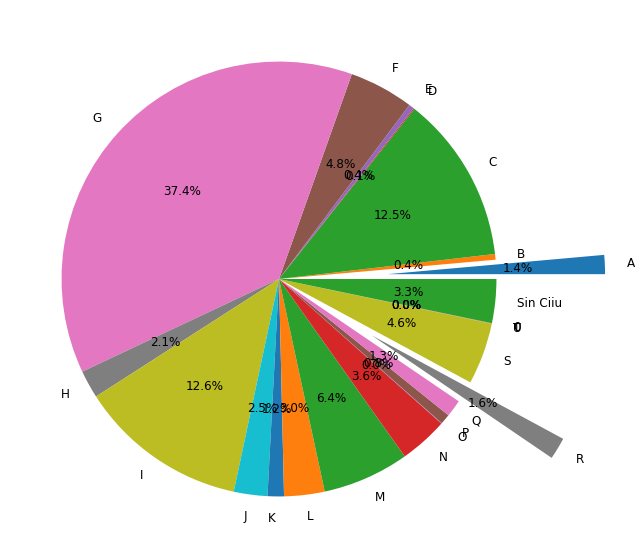

In [ ]:
#Creación de la clases figure/axes, creando el lienzo
fig, ax = plt.subplots(figsize=(10,10))
#Voy a dibujar
# plot --> 2D
# pie --> torta
# bar --> barras

#Función pie --> pie(x) el arreglo con los valores a distribuir
#label --> nombres de los sectores
#autopct --> formato del valor
explode = [0.0]*len(numero_micro[numero_micro!=0])
explode[17] = 0.5
explode[0] = 0.5
ax.pie(numero_micro[numero_micro!=0], explode=explode, labels=sectores[numero_micro!=0], autopct="%.1f%%")
plt.show()

In [ ]:
cond = [0]*4
cond[0] = numero_micro > np.quantile(numero_micro,0.75)
cond[1] = (numero_micro <= np.quantile(numero_micro,0.75)) & (numero_micro > np.median(numero_micro))
cond[2] = (numero_micro <= np.median(numero_micro)) & (numero_micro > np.quantile(numero_micro,0.25))
cond[3] = numero_micro < np.quantile(numero_micro,0.25)

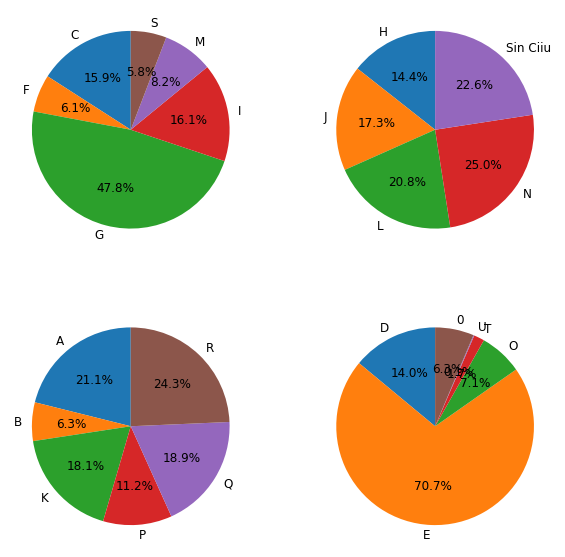

In [ ]:
#Hacer una figura y un axes al mismo tiempo
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

i = 0
for axrow in axs:
  for ax in axrow:
    ax.pie(numero_micro[cond[i]], labels=sectores[cond[i]], autopct='%1.1f%%', startangle=90)
    i +=1
plt.show()

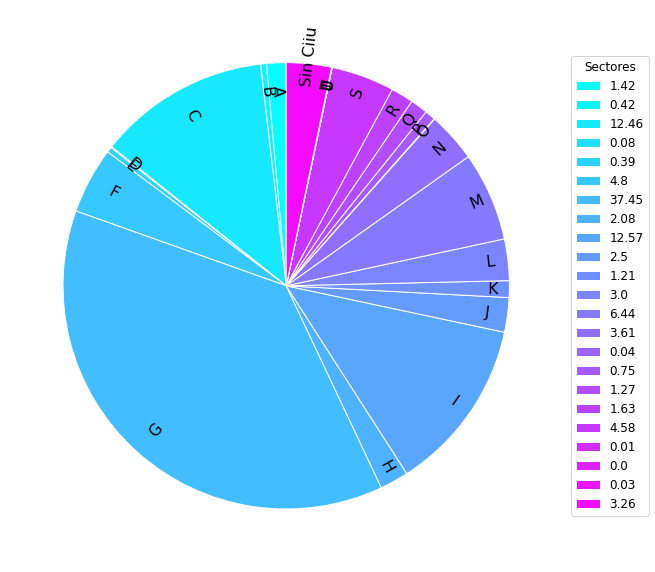

In [ ]:
#Mapa de colores
from matplotlib import cm

#Arreglo de porcentajes
#.sum() --> método para sumar
# np.round() --> función de numpy para redondear un arreglo
porcentajes = np.round(numero_micro*100/numero_micro.sum(),decimals=2)

#Longitud
N = porcentajes.shape[0]

#Mapa el colores cm.nombre(np.arange(N)/N) --> distribuir los colores
#nombre debe ser consultado en https://matplotlib.org/3.3.1/tutorials/colors/colormaps.html
cs=cm.cool(np.arange(N)/N)

#Fig  ax en un sola línea con subplots
fig, ax = plt.subplots(figsize=(10,12))

#ax.pie() --> método (regresan valores)
# labels --> etiquetas de los pedazos
# colors --> color de los pedazos
# startangle --> el ángulo de comienzo
# labeldis... rotatela... --> distancia y rotación de las etiquetas
# wedgeprops --> propiedades de los bordes
# textprops --> propiedades del texto

sections, texts = ax.pie(numero_micro, labels = sectores, colors =cs , startangle=90, labeldistance=0.9,
                         rotatelabels =True, wedgeprops=dict(edgecolor='w'),
                         textprops = dict(fontsize = 16, rotation_mode = 'anchor', va='center', ha='left'))

ax.legend(sections, porcentajes,
          title="Sectores",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))
plt.show()

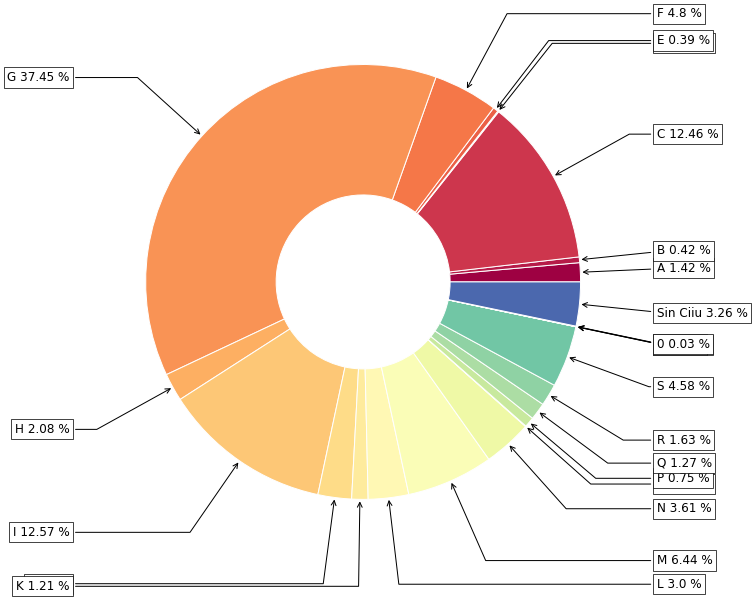

In [ ]:
#Hacer una figura y un axes al mismo tiempo

info = ["{} {} %".format(sectores[i], porcentajes[i]) for i in range(len(sectores))] 

#Lo mismo de la gráfica pasada
fig, ax = plt.subplots(figsize=(10,10))
cs = cm.Spectral(np.arange(N)/N)
sections, texts = ax.pie(numero_micro, colors=cs, wedgeprops=dict(width=0.6, edgecolor='w'))
###----- Pie chart

#Propiedades de la caja de texto
bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
#Propiedades de la anotación 
kw = dict(arrowprops=dict(arrowstyle="->",lw=1),
          bbox=bbox_props, zorder=0, va="center")

#Voy hacer una caja por cada pedazo (sections)
for i, p in enumerate(sections):
    #Calcular un ángulo
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    #Calculo posiciones 
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))

    #Propiedades de la anotación
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})

    #Anotación (información, posición del punto, posición del texto, las demás propiedades)
    ax.annotate(info[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                horizontalalignment=horizontalalignment, **kw)
plt.show()

[Plotly](https://plotly.com/)

In [ ]:
data1.head()

,secciones,descripci_n,no_de_empresas_micro,no_de_empresas_peque_a,no_de_empresas_mediana,no_de_empresas_grande,activos_micro,activos_peque_a,activos_mediana,activos_grande,total_empresas,total_activos
0,A,"Agricultura, ganadería, caza, silvicultura y p...",1782,589.0,246.0,61.0,94608451062,9.547165e+11,2.320141e+12,5.532929e+12,2678,8902394899663
1,B,Explotación de minas y canteras,533,97.0,40.0,26.0,18980841011,1.731597e+11,3.831393e+11,5.981170e+12,696,6556449864872
2,C,Industrias manufactureras,15688,1426.0,322.0,137.0,416719731347,1.924431e+12,3.167027e+12,3.277489e+13,17573,38283062843749
3,D,"Suministro de electricidad, gas, vapor y aire ...",97,23.0,15.0,18.0,5542594853,3.678438e+10,1.690693e+11,3.906635e+13,153,39277749293610
4,E,Distribución de agua; evacuación y tratamiento...,491,47.0,12.0,2.0,14675057791,5.147964e+10,1.014641e+11,2.060132e+12,552,2227750643179


In [ ]:
#Colores de matplotlib, se extraen de px.colors
colors_px = px.colors.sequential.Rainbow

#(Figure - ax) --> clase plotly interactiva
#Recibe siempre un Dataframe
#value --> x
#names --> label
fig = px.pie(data1, values='no_de_empresas_micro', names='secciones', color_discrete_sequence=colors_px)

#plt.show()
fig.show()

## Las barras de colores

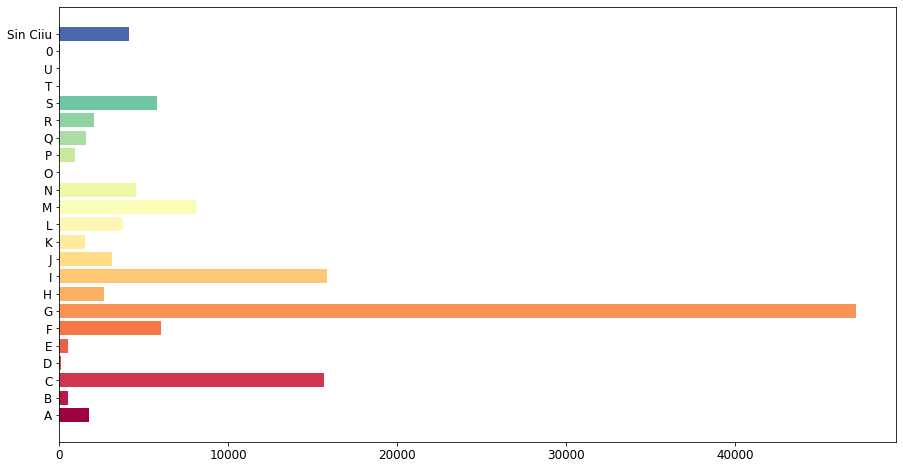

In [ ]:
#Creación de figura, ax
fig, ax = plt.subplots(figsize=(15,8))
#Colores
cs = cm.Spectral(np.arange(N)/N)
#Barras horizontales se usa barh(x,count_x)
ax.barh(sectores, numero_micro, color = cs)
plt.show()

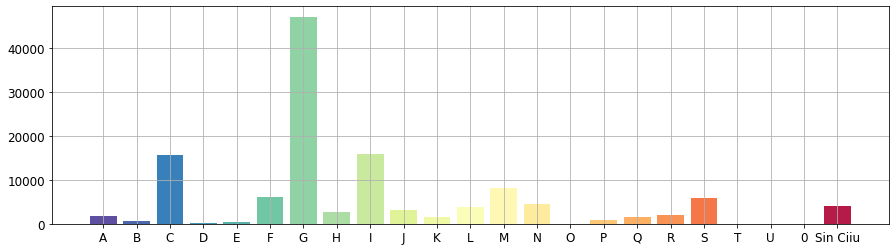

In [ ]:
fig, ax = plt.subplots(figsize=(15,4))
cs = cm.Spectral_r(np.arange(N)/N)
#Barra vertical bar
ax.bar(sectores, numero_micro, color=cs)
ax.grid()
plt.show()

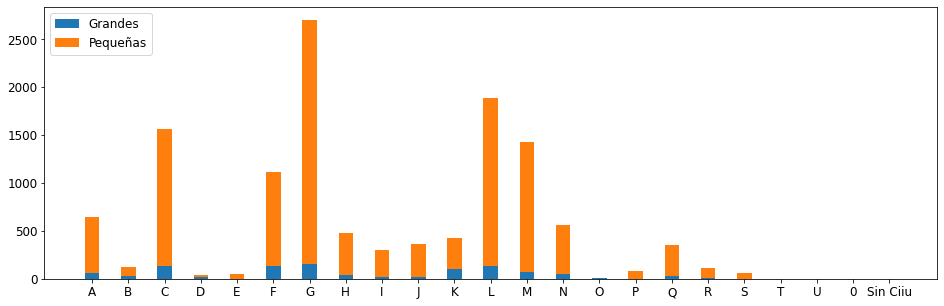

In [ ]:
labels = sectores
x = np.arange(len(labels))  # the label locations
width = 0.4  # the width of the bars

fig, ax = plt.subplots(figsize=(16,5))

rects1 = ax.bar(sectores, data1['no_de_empresas_grande'], 
                width, label='Grandes')
rects2 = ax.bar(sectores, data1['no_de_empresas_peque_a'],  width, label='Pequeñas', bottom=data1['no_de_empresas_grande'])
ax.legend()

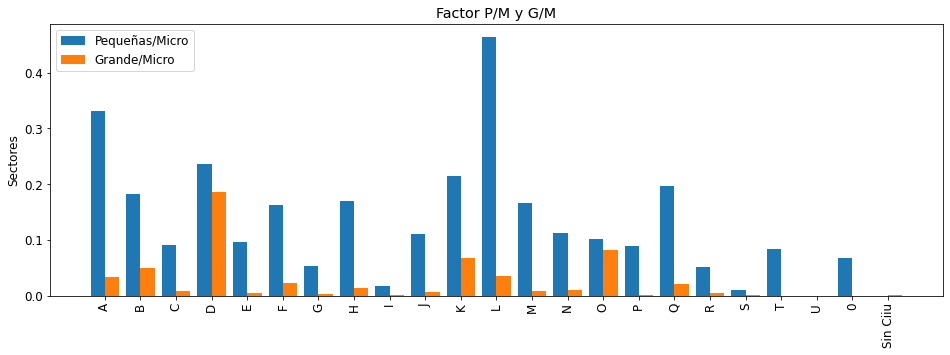

In [ ]:
labels = sectores

x = np.arange(len(labels))  # the label locations
width = 0.4  # the width of the bars

fig, ax = plt.subplots(figsize=(16,5))

rects1 = ax.bar(x - width/2, data1['no_de_empresas_peque_a']/numero_micro, 
                width, label='Pequeñas/Micro')
rects2 = ax.bar(x + width/2, data1['no_de_empresas_grande']/numero_micro,  width, label='Grande/Micro')

ax.set_ylabel('Sectores')
ax.set_title('Factor P/M y G/M')
ax.set_xticks(x)
ax.set_xticklabels(labels,rotation=90)
ax.legend()

plt.show()

## Ajuste de polinomios



### Polinomios 1D

Numpy me permite el manejo de polinomios usando los métodos asociados a  `poly`. Por ejemplo, imaginemos que tenemos el polinomio:

$$9x^2 + 6x + 8$$

Podemos generar un objeto tipo polinomio usando Numpy y la función `poly1d`


In [ ]:
p = np.poly1d([9,6,8]) #este es nuestro polinomio
#Podemos evaluar directamente cuando x = 5
p(5)

263

In [ ]:
#Hallar sus raíces
p.roots

array([-0.33333333+0.8819171j, -0.33333333-0.8819171j])

In [ ]:
def dir_nice(v):
  print("Clase:",type(p))
  methods = [m for m in dir(v) if not m.startswith('_') and callable(getattr(v, m))]
  attr = [m for m in dir(v) if not m.startswith('_') and not callable(getattr(v, m))]
  print("Atributos:",attr)
  print("Métodos:",methods,end="\n\n")

In [ ]:
#Miremos los atributos y métodos que tiene un polinomio de una dimensión
dir_nice(p)

Clase: <class 'numpy.poly1d'>
Atributos: ['c', 'coef', 'coefficients', 'coeffs', 'o', 'order', 'r', 'roots', 'variable']
Métodos: ['deriv', 'integ']



In [ ]:
#Derivada primer orden del polinomio 9x^2 + 6x +6 --> 18x + 6
p_derivada_1 = p.deriv(m=1)
p_derivada_1 

poly1d([18,  6])

In [ ]:
#Integral primer orden (indefinida) del polinomio 9x^2 + 6x + 8 --> 3x^3 + 3x^2 + 8x + c
p_integral_1 = p.integ(m=1, k=0)
p_integral_1

poly1d([3., 3., 8., 0.])

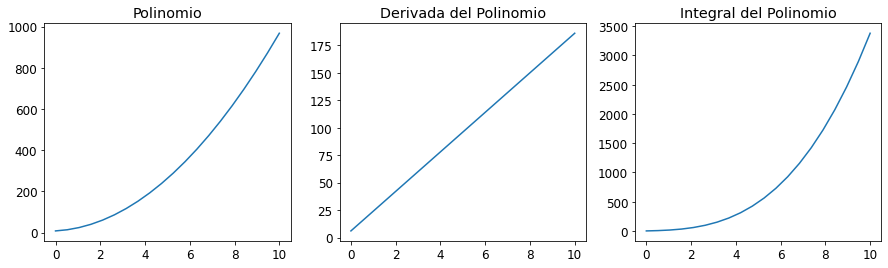

In [ ]:
#Grafiquemos nuestro porlinomio y su derividad e integral para x=[0,10]
x = np.linspace(0,10,20)
plt.figure(figsize=(15,4))
plt.subplot(1,3,1)
plt.title("Polinomio")
plt.plot(x,p(x))

plt.subplot(1,3,2)
plt.title("Derivada del Polinomio")
plt.plot(x,p_derivada_1(x))

plt.subplot(1,3,3)
plt.title("Integral del Polinomio")
plt.plot(x,p_integral_1(x))
plt.show()

### Ajustemos un polinomio 1D

In [ ]:
#Creamos un par x/y 
x = np.linspace(0,1,20)
y = np.sin(x) + 0.3*np.random.rand(20)
# Aquí vemos que  y = f(x)

#Ahora vamos a asumir una relación y = c_3 * x^3 + c_2 * x^2 + c_1 * x + c_0 y averiguar esos coeficientes
C = np.polyfit(x,y,3)
#Luego vamos a crear un polinomio 1D con esos coeficientes
p_fit = np.poly1d(C)

### Revisión del ajuste visual

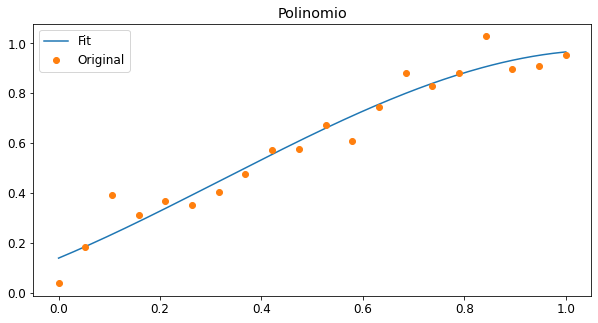

In [ ]:
#Creamos un  nuevo x y y (revisión) con más valores
x_rev = np.linspace(0,1,200)
y_rev = p_fit(x_rev)

#Y graficamos x_rev vs y_rev junto a nuestros x vs y originales
plt.figure(figsize=(10,5))
plt.title("Polinomio")
plt.plot(x_rev,y_rev,label="Fit")
plt.plot(x,y,'o',label="Original")
plt.legend()
plt.show()

### Error en el ajuste

Para ello revisar la función [polyfit](https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html#numpy.polyfit)

```
Returns
pndarray, shape (deg + 1,) or (deg + 1, K)
Polynomial coefficients, highest power first. If y was 2-D, the coefficients for k-th data set are in p[:,k].

residuals, rank, singular_values, rcond
Present only if full = True. Residuals is sum of squared residuals of the least-squares fit, the effective rank of the scaled Vandermonde coefficient matrix, its singular values, and the specified value of rcond. For more details, see linalg.lstsq.

Vndarray, shape (M,M) or (M,M,K)
Present only if full = False and cov`=True. The covariance matrix of the polynomial coefficient estimates. The diagonal of this matrix are the variance estimates for each coefficient. If y is a 2-D array, then the covariance matrix for the `k-th data set are in V[:,:,k]
```



In [ ]:
#Podemos hallar muchas más cosas con polifit
coef, res, rank, s_values, rcond = np.polyfit(x,y,3,full=True)

#O directamente hallar la matriz de covariaza
coef, V =np.polyfit(x,y,3,cov=True)

Podemos usar `res` para verificar que nuestro polinomio si sea adecuado:

In [ ]:
x1 = np.linspace(0,1,10)
y1 = 2*x1**4 + 3*x1**2 + 9
p_fit = list()
r_fit = list()
grados = [1,2,3,4]
for g in grados:
  C, res, _, _,_ = np.polyfit(x1,y1,g,full=True)
  p_fit.append(np.poly1d(C))
  r_fit.append(res)

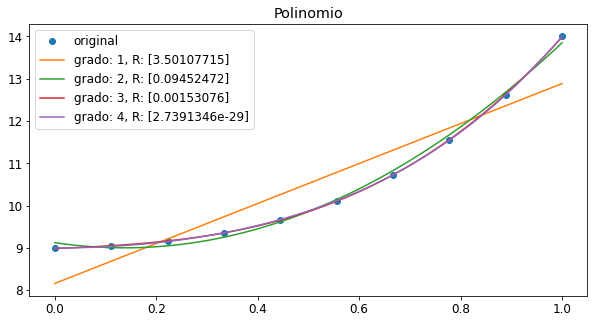

In [ ]:
plt.figure(figsize=(10,5))
plt.title("Polinomio")
plt.plot(x1,y1,"o", label="original")

x_rev = np.linspace(0,1,100)
for i in range(len(p_fit)): 
  plt.plot(x_rev,p_fit[i](x_rev),label="grado: {}, R: {}".format(grados[i],r_fit[i])) 

plt.legend()
plt.show()

### Un ejercicio completo

Voy hacer 3 conjuntos de datos (x,y), todos 3 tendrán algo de ruido para que no sea evidente el grado. El objetivo es hallar el polinomio que mejor se ajuste. Guardaré los valores, les pasaré los links y mostraré como cargarlos. Aquí viene un ejemplo de lo que hay que hacer, por favor hacer este proceso como un ejercicio en un notebook, el jueves veremos los resultados:    

En muchos casos leer y guardar datos para procesar y trabajar en numpy es complicado usando funciones nativas de python como *open*, para procesar datos en input/output tenemos algunas funciones.
 
La función para leer texto es:

```python
loadtxt(fname, dtype=numpy.float,
 comments="#", delimiter=None, 
 converts=None, skiprows=0, 
 usecols=None, unpack=False, ndim=0)
```

La función para guardar texto es:

```python
savetxt(fname, X, fmt='%.18e', 
delimiter='', newline='\n',
header='', footer='', comments='#')
```


In [ ]:
x = np.linspace(0,10,100)
y = 2*x**7 + 5*x**5 - 7*x**3 + np.random.rand(x.shape[0])
#Grabar un txt usando numpy
table = np.array([x,y])
np.savetxt("datos.txt",table.T,header='x \t y',footer='By: Sheryl Avendaño')


Leer los datos primero, para ello podemos usar:

In [ ]:
x,y = np.loadtxt('datos.txt',unpack=True)

Hagamos un gráfica para intuir el grado

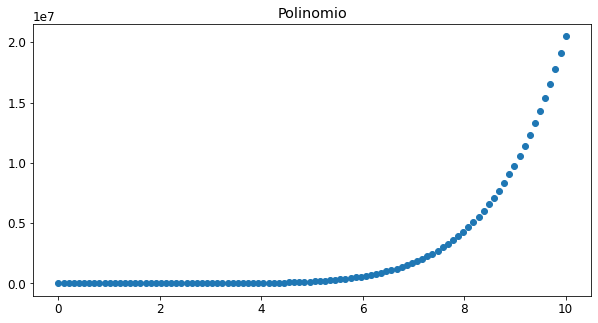

In [ ]:
plt.figure(figsize=(10,5))
plt.title("Polinomio")
plt.plot(x,y,"o")
plt.show()

Por la forma que crece es posible que sea un grado grande. Comenzaremos por el grado 3

In [ ]:
grados = range(3,15)
p_fit = dict()
r_fit = dict()
for g in grados:
  C, res, _, _,_ = np.polyfit(x,y,g,full=True)
  p_fit[g] = np.poly1d(C)
  r_fit[g] = res

Revisemos los residuos y escojemos el menor

In [ ]:
r_fit

{3: array([3.34109651e+13]),
 4: array([2.08574797e+12]),
 5: array([4.96118353e+10]),
 6: array([2.56981035e+08]),
 7: array([7.21570389]),
 8: array([7.20858995]),
 9: array([6.90167339]),
 10: array([6.87950971]),
 11: array([6.84460316]),
 12: array([6.83676278]),
 13: array([6.75078315]),
 14: array([6.7394402])}

Veremos los coeficientes del que tiene el menor residuo

In [ ]:
p_fit[14]

poly1d([-2.10358148e-08,  1.32760392e-06, -3.67499988e-05,  5.84192942e-04,
       -5.84773637e-03,  3.77585772e-02, -1.51455690e-01,  2.30657740e+00,
        1.75839051e-01,  2.11356855e+00,  7.99125643e+00, -1.80354931e+01,
        7.79223272e+00, -2.45281259e+00,  9.42106086e-01])

Es importante que la contribución de los coeficients (dado a los valores de y) sea de una buena magnitud. Miremos el polinomio en donde los residuos se empiezan a estabilizar:

In [ ]:
p_fit[7]

poly1d([ 2.00002283e+00, -7.62489427e-04,  5.00998591e+00, -6.46004182e-02,
       -6.78848344e+00, -3.03389188e-01,  2.35204686e-02,  7.84653890e-01])

Por supuesto ya que sabemos cual es el grado adecuado puede haber algo de prejuicio. Pero ahora hagamos el ejercicio con los documentos que estan en classroom junto al vídeo.

